In [1]:
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from scipy import stats
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
import pickle
import barcodes
from cka import cka
from msid import msid_score
from svcca import svcca

def msid_score_n(a, b, n):
    total = 0.0
    for _ in range(n):
        total += msid_score(a, b)
    return total / n

In [5]:
def create_ring(N_points, R, noise=0):
    arr = np.zeros((N_points, 2))

    for i in range(N_points):
        theta = 2 * np.pi * i / N_points
        d = (np.array([np.cos(theta), np.sin(theta)])
                 + np.random.multivariate_normal(np.zeros(2), noise * np.eye(2))) * R

        arr[i] = d

    return arr

In [6]:
def create_set_of_rings(N_large, N_total, noise = 0):
    A = []

    for i in range(N_total):
        np.random.seed(i)
        if i < N_large:
            R = 1
        else:
            R = (i - N_large + 1) / (N_total - N_large + 1)
            idx = (i - N_large)
            
            if idx % 2 == 0:
                R = 1 + 0.25 * (2 + idx) / 2 
            else:
                R = 1 - 0.25 * (2+ idx - 1) / 2
            
        A.append(create_ring(100, R=R, noise=noise))
        
    A_mod = np.concatenate(A)
    
    return A_mod

In [7]:
N_rings = 5
A_base = create_set_of_rings(1, N_rings)

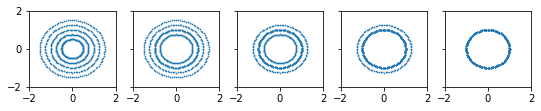

In [8]:
ALL = list(range(2, N_rings + 1))

fig, ax = plt.subplots(1, len(ALL) + 1)
fig.set_size_inches(9, 1.4)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
    else:
        A = create_set_of_rings(k, N_rings)

    ax[idx].scatter(x = A[:,0], y = A[:,1], s = 0.5)
    ax[idx].set_xlim(-2, 2)
    ax[idx].set_ylim(-2, 2)
    
for ax in fig.get_axes():
    ax.label_outer()

row, col 0 0
row, col 0 1
row, col 0 2
row, col 1 0
row, col 1 1


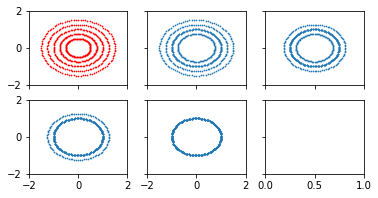

In [9]:
COLS = int(np.ceil((len(ALL) + 1)/2))
fig, ax = plt.subplots(2, COLS)
fig.set_size_inches(6, 3)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
        color = 'r'
    else:
        A = create_set_of_rings(k, N_rings)
        color = '#1f77b4'

    row = idx // COLS
    col = idx % COLS
    
    print('row, col', row, col)
        
    ax[row, col].scatter(x = A[:,0], y = A[:,1], s = 0.5, color = color)
    ax[row, col].set_xlim(-2, 2)
    ax[row, col].set_ylim(-2, 2)
    
for ax in fig.get_axes():
    ax.label_outer()

No handles with labels found to put in legend.


H0: num barcodes 0
H1: num barcodes 0


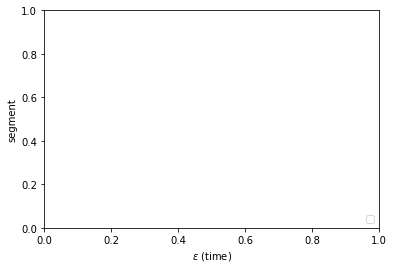

No handles with labels found to put in legend.


H0: num barcodes 0
H1: num barcodes 0


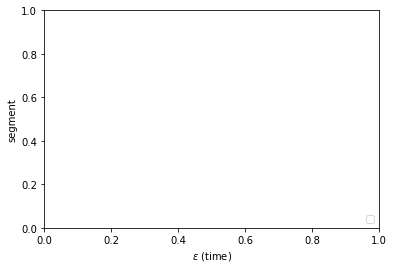

H0: num barcodes 0
H1: num barcodes 600
max0,976Barcode 1 = 0.035174768418073654
maxBarcode 1 = 0.11198318749666214
middleBarcode 1 = 0.0034274086356163025


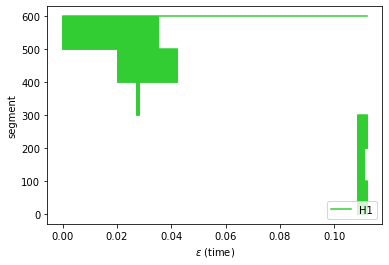

H0: num barcodes 0
H1: num barcodes 200
max0,976Barcode 1 = 0.026847925037145615
maxBarcode 1 = 0.026847925037145615
middleBarcode 1 = 0.026847925037145615


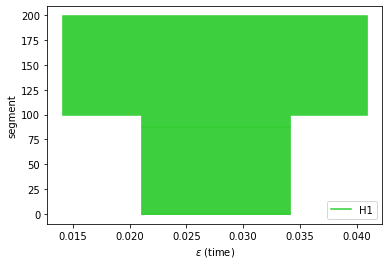

H0: num barcodes 0
H1: num barcodes 300
max0,976Barcode 1 = 0.035174768418073654
maxBarcode 1 = 0.11198318749666214
middleBarcode 1 = 0.031426265835762024


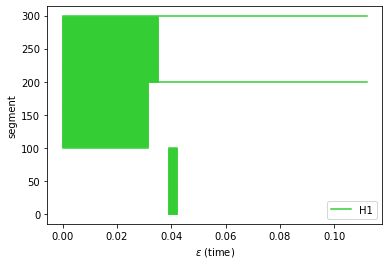

H0: num barcodes 0
H1: num barcodes 500
max0,976Barcode 1 = 0.010321404784917831
maxBarcode 1 = 0.013078518211841583
middleBarcode 1 = 0.006443798542022705


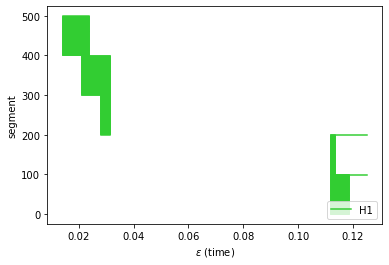

H0: num barcodes 0
H1: num barcodes 300
max0,976Barcode 1 = 0.042209722101688385
maxBarcode 1 = 0.11198318749666214
middleBarcode 1 = 0.035174768418073654


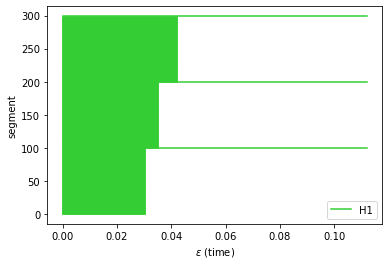

H0: num barcodes 0
H1: num barcodes 400
max0,976Barcode 1 = 0.023914720863103867
maxBarcode 1 = 0.023914720863103867
middleBarcode 1 = 0.00928284227848053


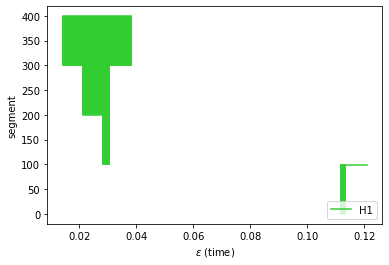

H0: num barcodes 0
H1: num barcodes 400
max0,976Barcode 1 = 0.042209722101688385
maxBarcode 1 = 0.11198318749666214
middleBarcode 1 = 0.035174768418073654


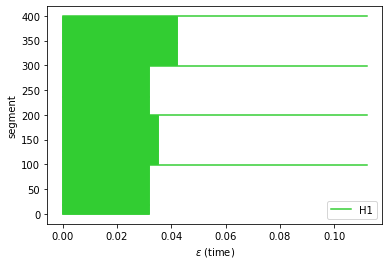

H0: num barcodes 0
H1: num barcodes 300
max0,976Barcode 1 = 0.017732389271259308
maxBarcode 1 = 0.017732389271259308
middleBarcode 1 = 0.010697435587644577


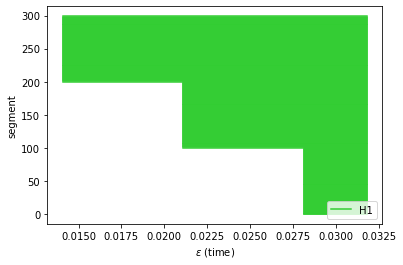

In [10]:
res1 = []
res2 = []
barcs1 = []
barcs2 = []
res_cka = []
res_imd = []
res_svcca = []

for i, k in enumerate(range(1, N_rings + 1)):
    A_mod = create_set_of_rings(k, N_rings)
    
    barc = barcodes.calc_embed_dist(A_base, A_mod, norm = 'quantile')
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '')
    plt.show()
    res1.append(barcodes.h1sum(barc))
    barcs1.append(barc)
    
    barc = barcodes.calc_embed_dist(A_mod, A_base, norm = 'quantile')
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '')
    plt.show()
    res2.append(barcodes.h1sum(barc))
    barcs2.append(barc)
    
    res_cka.append(cka(A_base, A_mod))
    res_imd.append(msid_score_n(A_base, A_mod, 100))
    res_svcca.append(svcca(A_base.T, A_mod.T))

In [11]:
pickle.dump((res1, res2, res_cka), open('exp_rings.pickle', 'wb'))
#(res1, res2, res_cka) = pickle.load(open('exp_rings.pickle', 'rb'))

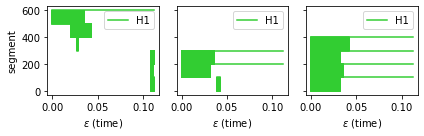

In [22]:
ALL = list(range(1, N_rings + 1))

rings2show = [2, 3, 5]
cols = len(rings2show)

fig, ax = plt.subplots(1, cols, sharey = True)
fig.set_size_inches((2 * cols, 2))

for col, k in enumerate(rings2show):
    i = ALL.index(k)
    barc = barcs1[i]
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '', ax = ax[col], fig = fig)
    
    if col > 0:
        ax[col].set_ylabel('')
        
    ax[col].legend(loc = 'best')
    
fig.tight_layout()
plt.show()

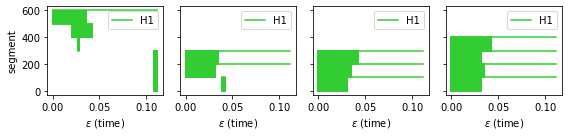

In [23]:
ALL = list(range(1, N_rings + 1))

rings2show = [2, 3, 4, 5]
cols = len(rings2show)

fig, ax = plt.subplots(1, cols, sharey = True)
fig.set_size_inches((2 * cols, 2))

for col, k in enumerate(rings2show):
    i = ALL.index(k)
    barc = barcs1[i]
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '', ax = ax[col], fig = fig)
    
    if col > 0:
        ax[col].set_ylabel('')
        
    ax[col].legend(loc = 'best')
    
fig.tight_layout()
plt.show()

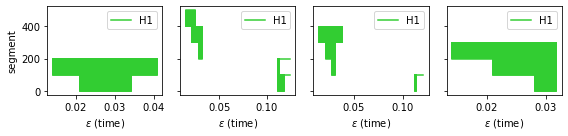

In [24]:
ALL = list(range(1, N_rings + 1))

rings2show = [2, 3, 4, 5]
cols = len(rings2show)

fig, ax = plt.subplots(1, cols, sharey = True)
fig.set_size_inches((2 * cols, 2))

for col, k in enumerate(rings2show):
    i = ALL.index(k)
    barc = barcs2[i]
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '', ax = ax[col], fig = fig)
    
    if col > 0:
        ax[col].set_ylabel('')
        
    ax[col].legend(loc = 'best')
    
fig.tight_layout()
plt.show()

In [22]:
res_total = 0.5 * (np.array(res1) + np.array(res2))

In [23]:
clusters_list = list(range(1, N_rings+1))

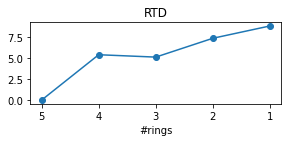

In [24]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((4.5, 1.5))
ax.set_xlabel('#rings')
ax.set_xticks(list(range(1, N_rings+1)))
ax.set_xticklabels(list(np.arange(N_rings, 0, -1)))
plt.title('RTD')
plt.plot(clusters_list, res_total, 'o-')
plt.show()

In [25]:
stats.kendalltau(res_total, range(N_rings)).correlation

0.7999999999999999

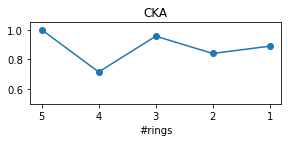

In [26]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches((4.5, 1.5))
ax.set_xlabel('#rings')
ax.set_ylim(0.5, 1.05)
ax.set_xticks(list(range(1, N_rings+1)))
ax.set_xticklabels(list(np.arange(N_rings, 0, -1)))
plt.title('CKA')
plt.plot(clusters_list, res_cka, 'o-')
plt.show()

In [27]:
stats.kendalltau(res_cka, range(N_rings)).correlation

-0.19999999999999998

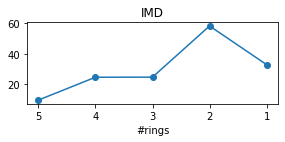

In [34]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches((4.5, 1.5))
ax.set_xlabel('#rings')
#ax.set_ylim(0.5, 1.05)
ax.set_xticks(list(range(1, N_rings+1)))
ax.set_xticklabels(list(np.arange(N_rings, 0, -1)))
plt.title('IMD')
plt.plot(clusters_list, res_imd, 'o-')
plt.show()

In [29]:
stats.kendalltau(res_imd, range(N_rings)).correlation

0.7999999999999999

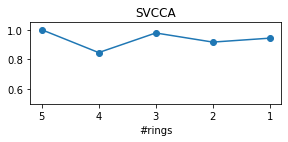

In [35]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches((4.5, 1.5))
ax.set_xlabel('#rings')
ax.set_ylim(0.5, 1.05)
ax.set_xticks(list(range(1, N_rings+1)))
ax.set_xticklabels(list(np.arange(N_rings, 0, -1)))
plt.title('SVCCA')
plt.plot(clusters_list, res_svcca, 'o-')
plt.show()

In [32]:
stats.kendalltau(res_svcca, range(N_rings)).correlation

-0.19999999999999998